In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [344]:
df = pd.read_csv('honeyproduction 1998-2021.csv')
df.head()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [345]:
df['numcol'] = df['numcol']/1000
df['totalprod'] = df['totalprod']/1000000
df['stocks'] = df['stocks']/1000000
df['prodvalue'] = df['prodvalue']/1000000

In [346]:
df.head()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16.0,71,1.136,0.159,0.72,0.818,1998
1,Arizona,55.0,60,3.300,1.485,0.64,2.112,1998
2,Arkansas,53.0,65,3.445,1.688,0.59,2.033,1998
3,California,450.0,83,37.350,12.326,0.62,23.157,1998
4,Colorado,27.0,72,1.944,1.594,0.70,1.361,1998


In [121]:
df.shape

(985, 8)

In [122]:
df.dtypes

State           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

In [123]:
nv = df.isnull().sum()
nv [nv>0]

Series([], dtype: int64)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        985 non-null    object 
 1   numcol       985 non-null    float64
 2   yieldpercol  985 non-null    int64  
 3   totalprod    985 non-null    float64
 4   stocks       985 non-null    float64
 5   priceperlb   985 non-null    float64
 6   prodvalue    985 non-null    float64
 7   year         985 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 61.7+ KB


In [125]:
df.duplicated().sum()

0

In [126]:
df.columns

Index(['State', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

In [127]:
df[['State','year','totalprod']].head(7)

,State,year,totalprod
0,Alabama,1998,1.136
1,Arizona,1998,3.300
2,Arkansas,1998,3.445
3,California,1998,37.350
4,Colorado,1998,1.944
5,Florida,1998,22.540
6,Georgia,1998,4.200


   ### Q1) How has honey production yield changed from 1998 to 2021.

In [128]:
df1 = df.groupby(['year'])['totalprod'].median()
df1.head()

year
1998    1.740
1999    1.680
2000    1.725
2001    1.444
2002    1.422
Name: totalprod, dtype: float64

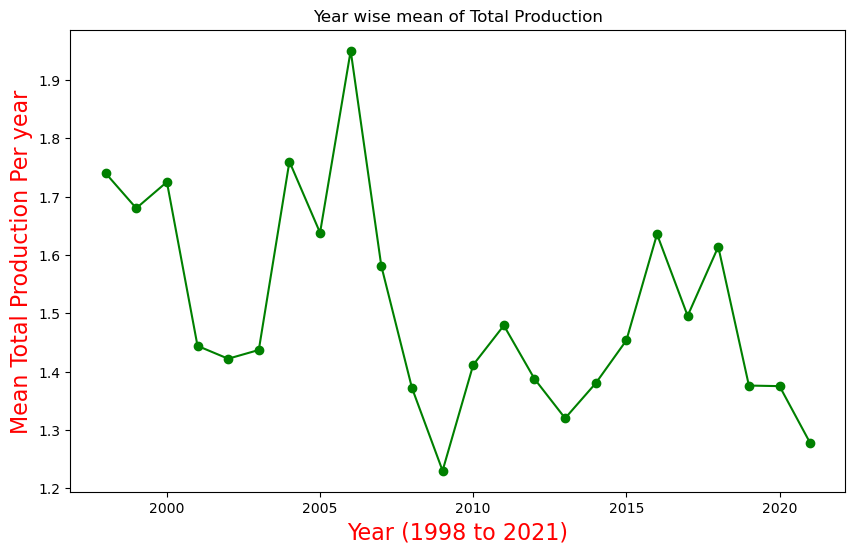

In [129]:
df1 = df.groupby(['year'])['totalprod'].median()
plt.figure(figsize=(10,6))
#df1.plot.line(marker='>',color='red')
plt.plot(df1,color='green',marker='o')
plt.xlabel('Year (1998 to 2021)',color='red',size=16)
plt.ylabel('Mean Total Production Per year',color='red',size=16)
plt.title('Year wise mean of Total Production')
plt.show()

 <b>First hoeny production decrease from 1998 to 2003 then increases from 2004 to 2006. then again townward till 2021<br>
 In 2009 minimum honey production was done.<br>
 In 2006 maximum honey production was done. After 2006 great fall in produciton.<br>
 As shown above in chart

### Q2) Over time, what are the major production trends across the states.

In [130]:
df2 = df[['year','State','totalprod']]
df2.head()

,year,State,totalprod
0,1998,Alabama,1.136
1,1998,Arizona,3.300
2,1998,Arkansas,3.445
3,1998,California,37.350
4,1998,Colorado,1.944


<Figure size 800x500 with 0 Axes>

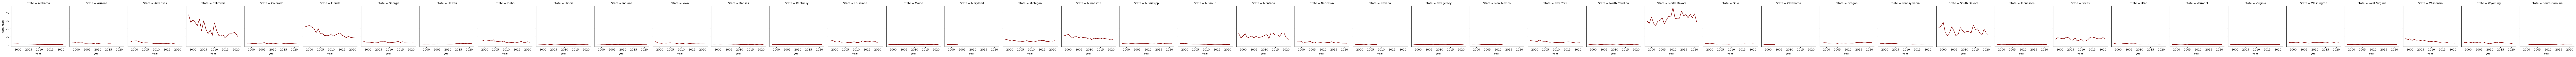

In [131]:
plt.figure(figsize=(8,5))
reg = sns.FacetGrid(data=df2,col='State')
reg.map(sns.lineplot,'year','totalprod',color='maroon')
plt.show()

<b> Across all states production of honey is decreasing over time.<br>
 States California, North Dakota, South Dakota, florida are Top 5 honey producing States in USA

### Q3) Does the data show any trends in terms of the number of honey producing colonies and yield per colony before 2006,which was when concern over Colony Collapse Disorder spread nationwide.

<b> Yield per colony depend upon then no. of colonies.<br>
if no. of colony is more then yield per colony is also more.

In [195]:
df3 = df[['numcol','yieldpercol','year']][df['year']<2006].groupby(['year'])[['yieldpercol','numcol']].median()

In [227]:
df3.head(4)

,yieldpercol,numcol
year,,
1998,66.0,27.0
1999,66.0,27.0
2000,65.0,25.0
2001,61.0,24.5


<Figure size 1000x800 with 0 Axes>

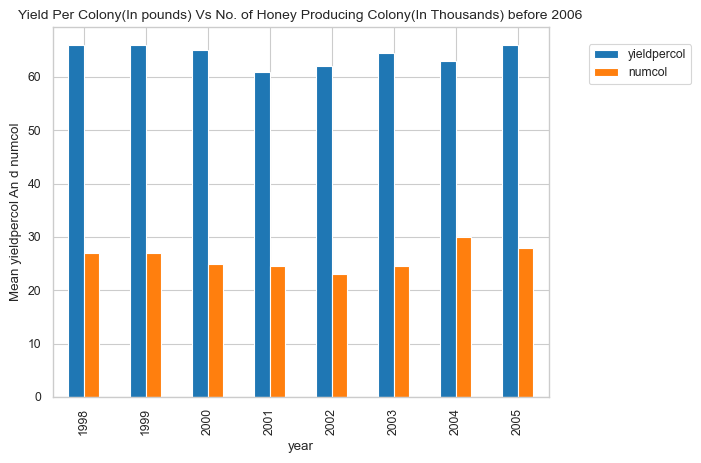

In [228]:
plt.figure(figsize=(10,8))
df3.plot.bar()
plt.ylabel('Mean yieldpercol An d numcol')
plt.xticks(rotation=90)
plt.title('Yield Per Colony(In pounds) Vs No. of Honey Producing Colony(In Thousands) before 2006',size=10)
plt.legend(loc='right',bbox_to_anchor=(0.3,0.4,1,1))
plt.show()

<b>4.Are there any patterns that can be observed between total honey production and value of production every year?<br>
* Value of the production and Total production are opposite when one increases other decreases.
* Over the time Value of production is increasing.
* Over the time Total Production is decreasing

In [229]:
df4 = df[['totalprod','prodvalue','year']].groupby('year')[['totalprod','prodvalue']].median()
df4.head(4)

,totalprod,prodvalue
year,,
1998,1.740,1.3610
1999,1.680,1.2770
2000,1.725,1.0350
2001,1.444,1.1385


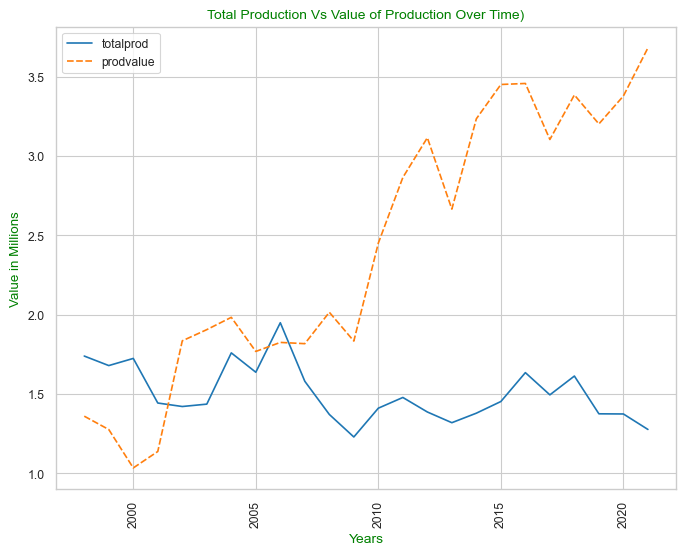

In [247]:
plt.figure(figsize=(8,6))
sns.lineplot(df4)
plt.xticks(rotation=90)
plt.title('Total Production Vs Value of Production Over Time)',size=10,color='green')
plt.xlabel('Years',size=10,color='green')
plt.ylabel('Value in Millions',color='green')
plt.show()

<b> Q5) How has the value of production, which in some sense could be tied to demand, changed every year?
* As shown in chart below the Production Value is continuously increasing over time.
* So demand is tied by increasing the value of production

In [253]:
df['demand']=df['totalprod']-df['stocks']
df5 = df[['prodvalue','year','demand']].groupby(['year'])[['prodvalue','demand']].median()
df5.head(4)

,prodvalue,demand
year,,
1998,1.3610,0.9770
1999,1.2770,0.7370
2000,1.0350,0.7830
2001,1.1385,0.8485


<Figure size 1000x800 with 0 Axes>

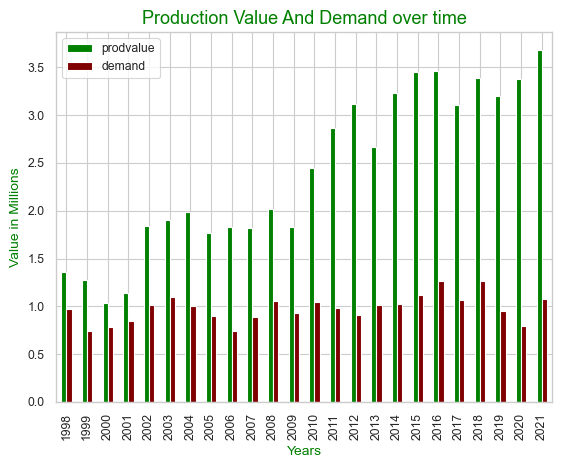

In [264]:
plt.figure(figsize=(10,8))
df5.plot.bar(color=['green','maroon'])
plt.title('Production Value And Demand over time',size=13,color='green')
plt.xlabel('Years',size=10,color='green')
plt.ylabel('Value in Millions',size=10,color='green')
plt.xticks(rotation=90)
plt.show()

<b> Q6) Constructs the related plots using Seaborn and Matplot apply customization and derive insights from the visualization.
* Top 10 honey producing states

#### Ploting Top 10 Mean of State vs Totalprod in a barplot.

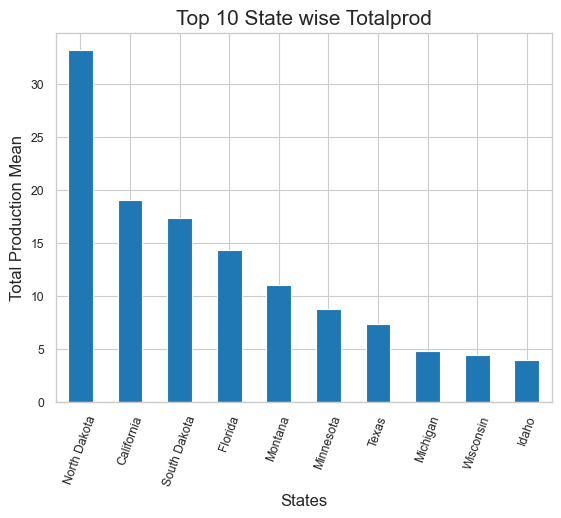

In [314]:
df6 = df.groupby('State')['totalprod'].mean().sort_values(ascending=False).head(10)
df6.plot.bar()
plt.xlabel('States',size=12)
plt.ylabel('Total Production Mean',size=12)
plt.title('Top 10 State wise Totalprod',size=15)
plt.xticks(rotation=70)
plt.show()

#### Ploting Top 10 Mean of Years vs Totalprod in a barplot.

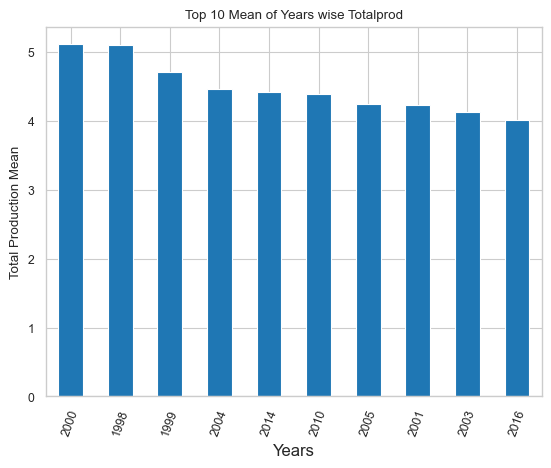

In [324]:
df7 = df.groupby('year')['totalprod'].mean().sort_values(ascending=False).head(10)
df7.plot.bar()
plt.xlabel('Years',size=12)
plt.ylabel('Total Production Mean')
plt.title('Top 10 Mean of Years wise Totalprod')
plt.xticks(rotation=70)
plt.show()

#### Ploting Top 10 Mean of States vs Numcol in a Scatterplot.

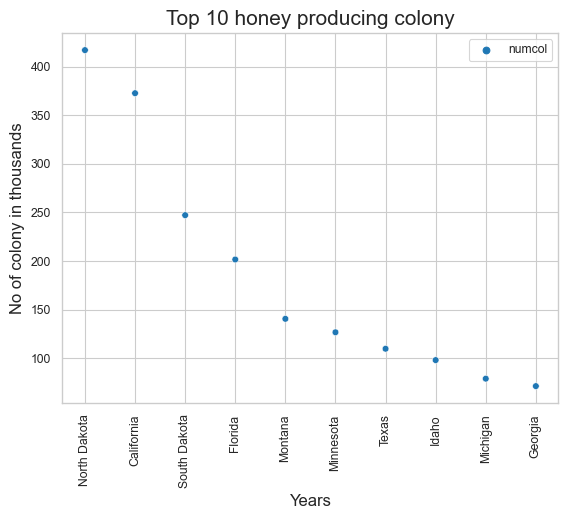

In [333]:
df8=df.groupby('State')[['numcol']].mean().sort_values(by='numcol',ascending=False).head(10)
sns.scatterplot(df8)
plt.xlabel('Years',size=12)
plt.ylabel('No of colony in thousands',size=12)
plt.title('Top 10 honey producing colony',size=15)
plt.xticks(rotation=90)
plt.show()

### Corelation among DataFrame

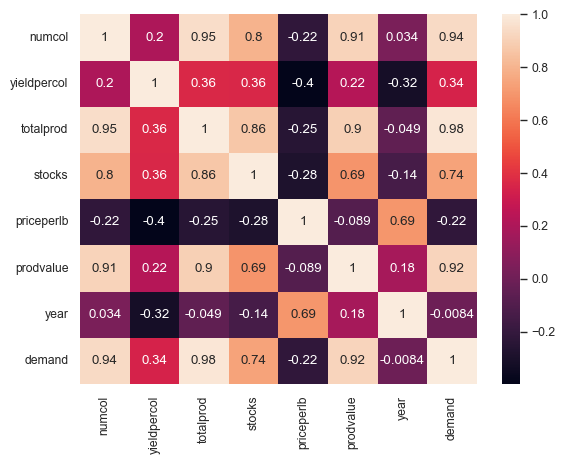

In [338]:
corr = df.corr()
sns.heatmap(data=corr,annot=True)
plt.show()

### Ploting jointplot with DataFrame

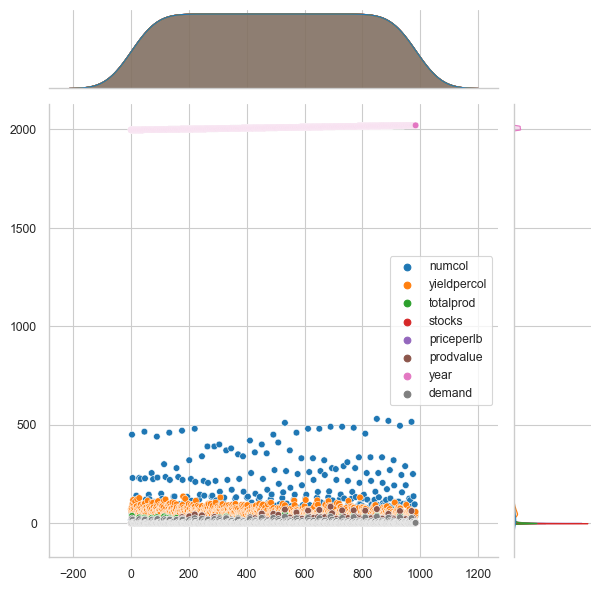

In [342]:
sns.jointplot(data=df)
plt.show()